In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('../data/raw/Waste_Management_and_Recycling_India.csv')

In [3]:
data.head()

,City/District,Waste Type,Waste Generated (Tons/Day),Recycling Rate (%),Population Density (People/km²),Municipal Efficiency Score (1-10),Disposal Method,Cost of Waste Management (₹/Ton),Awareness Campaigns Count,Landfill Name,"Landfill Location (Lat, Long)",Landfill Capacity (Tons),Year
0,0.666667,1.00,0.644102,0.690909,0.408167,0.8,0.000000,0.567838,0.70,0.666667,0.545455,0.301293,0.0
1,0.666667,0.75,0.070757,0.472727,0.408167,0.0,0.000000,0.506005,0.60,0.666667,0.545455,0.301293,0.0
2,0.666667,0.25,0.808005,0.418182,0.408167,0.6,0.333333,0.642126,0.65,0.666667,0.545455,0.301293,0.0
3,0.666667,0.00,0.889006,0.472727,0.408167,0.0,0.666667,0.221308,0.70,0.666667,0.545455,0.301293,0.0
4,0.666667,0.50,0.477453,0.254545,0.408167,0.4,1.000000,0.382117,0.80,0.666667,0.545455,0.301293,0.0


In [4]:
data.shape

(850, 13)

In [5]:
data.dtypes

City/District                        float64
Waste Type                           float64
Waste Generated (Tons/Day)           float64
Recycling Rate (%)                   float64
Population Density (People/km²)      float64
Municipal Efficiency Score (1-10)    float64
Disposal Method                      float64
Cost of Waste Management (₹/Ton)     float64
Awareness Campaigns Count            float64
Landfill Name                        float64
Landfill Location (Lat, Long)        float64
Landfill Capacity (Tons)             float64
Year                                 float64
dtype: object

In [6]:
data.isnull().sum()

City/District                        0
Waste Type                           0
Waste Generated (Tons/Day)           0
Recycling Rate (%)                   0
Population Density (People/km²)      0
Municipal Efficiency Score (1-10)    0
Disposal Method                      0
Cost of Waste Management (₹/Ton)     0
Awareness Campaigns Count            0
Landfill Name                        0
Landfill Location (Lat, Long)        0
Landfill Capacity (Tons)             0
Year                                 0
dtype: int64

In [7]:
data.duplicated().sum()

0

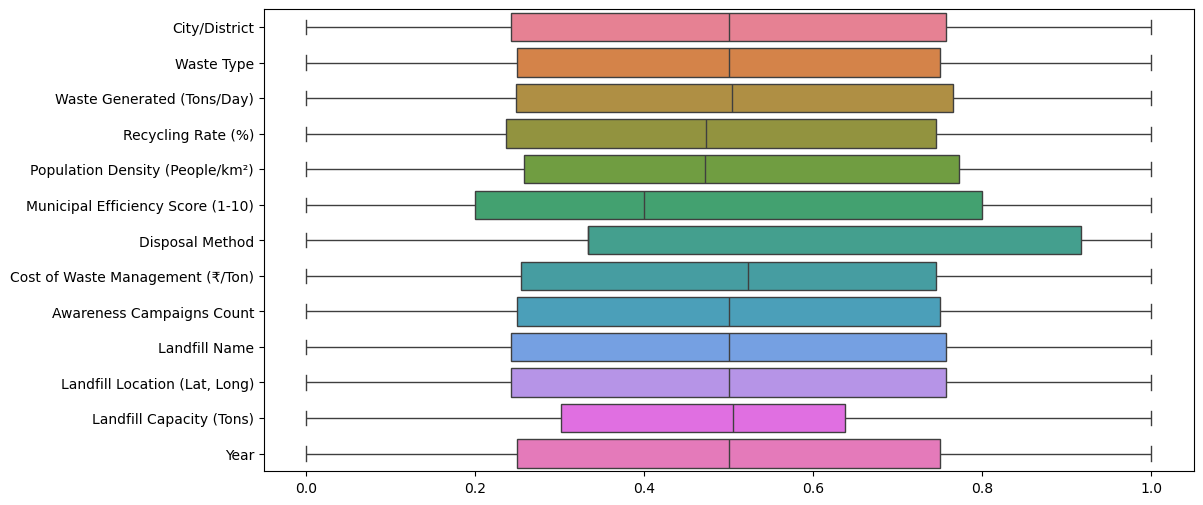

In [8]:
#Checking for outliers using boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, orient="h")
plt.show()

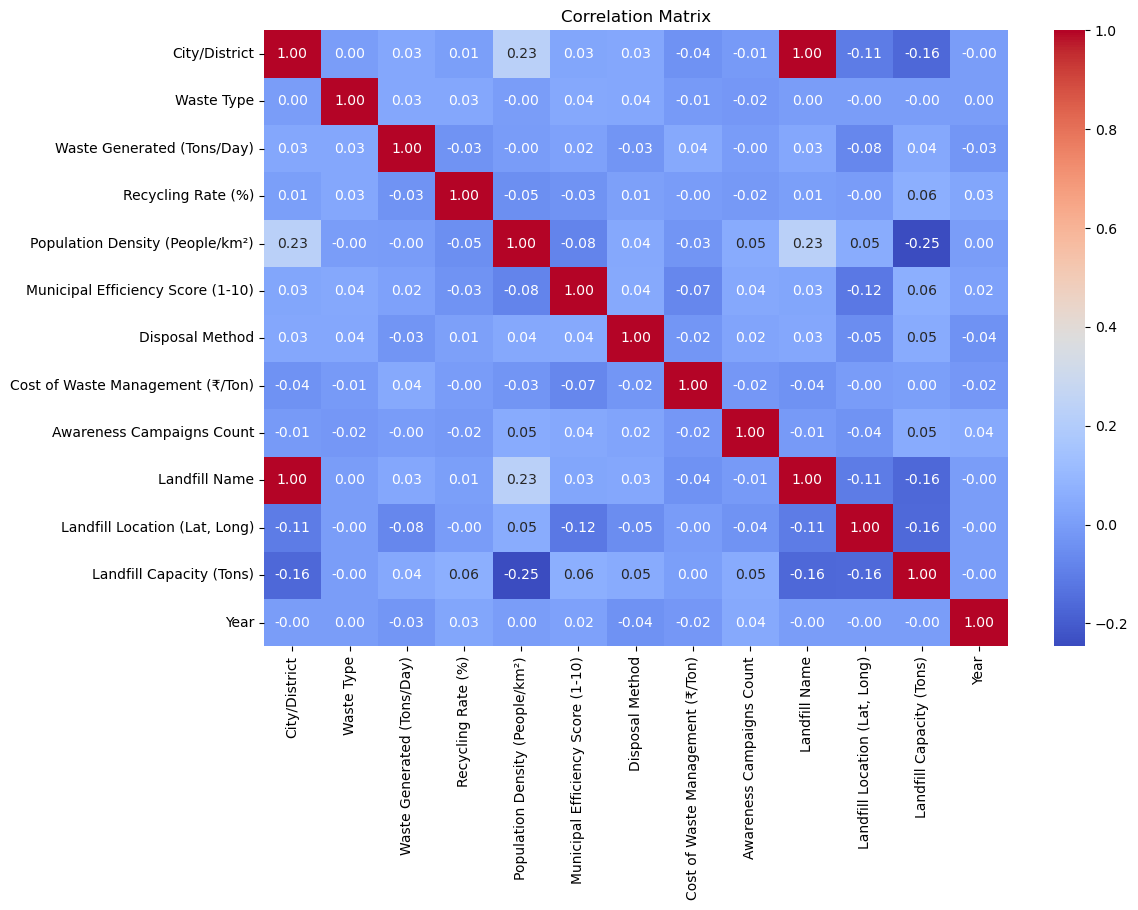

In [9]:
# correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

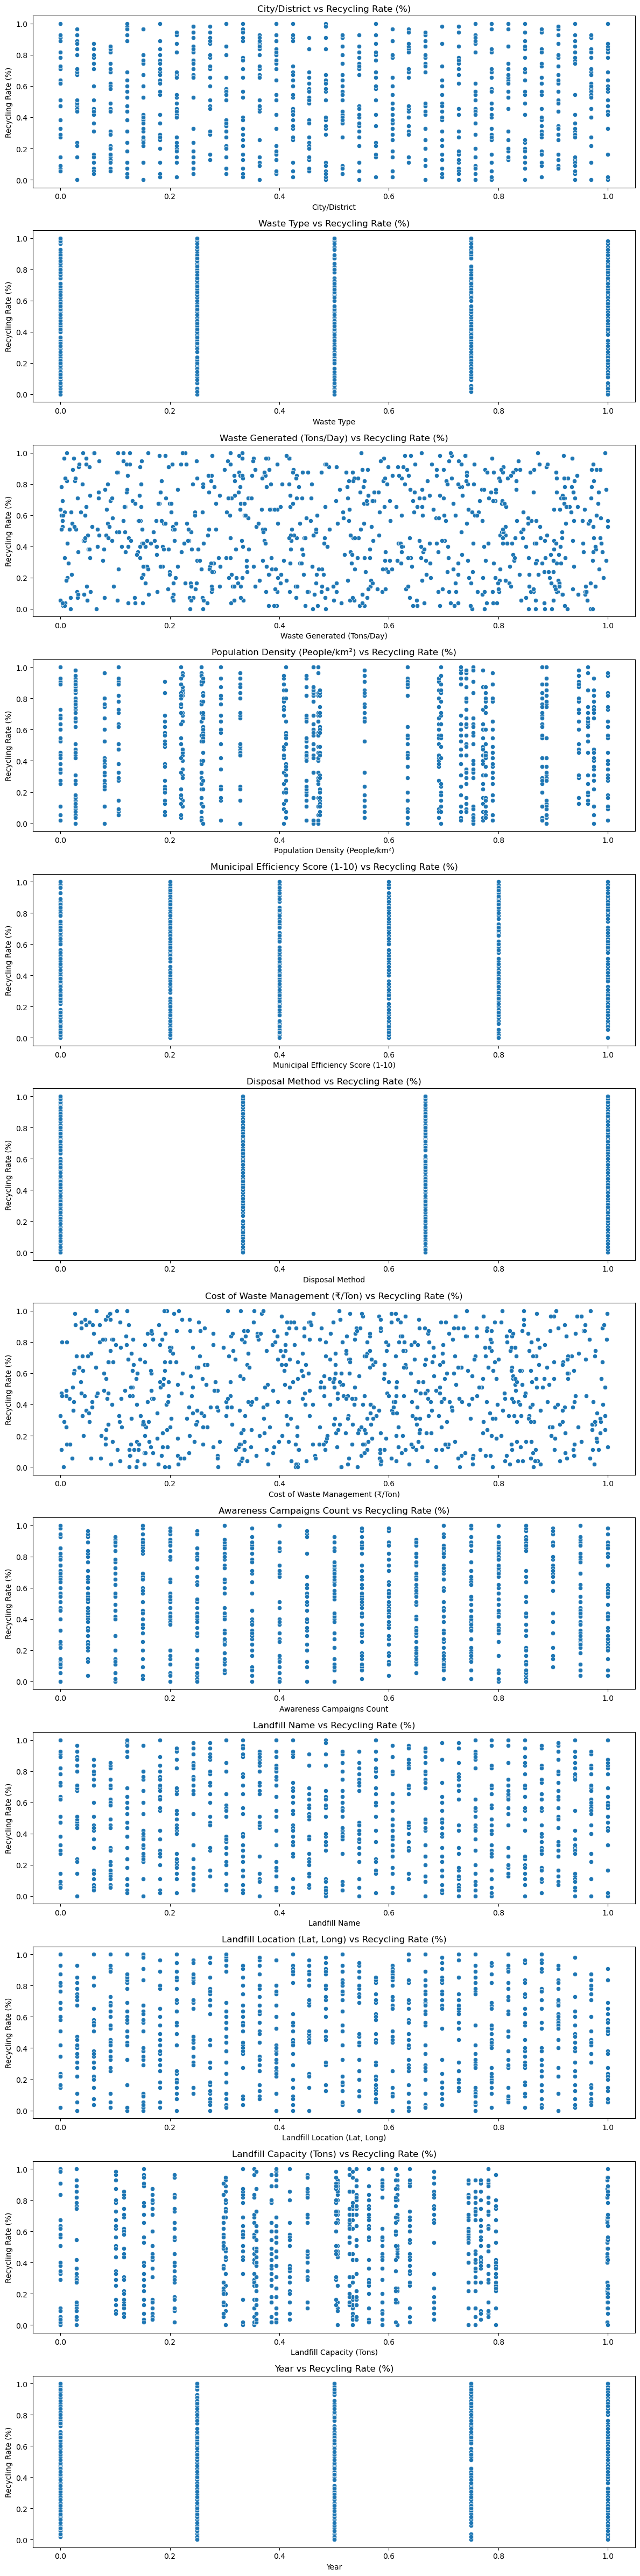

In [10]:
# Predictive relationships with target variable in one line 3 plots

target = 'Recycling Rate (%)'
features = [col for col in data.columns if col != target]

plt.figure(figsize=(12, len(features) * 4))

for i, feature in enumerate(features, 1):
    plt.subplot(len(features), 1, i)
    if data[feature].dtype in ['int64', 'float64']:
        sns.scatterplot(data=data, x=feature, y=target)
    else:
        sns.boxplot(data=data, x=feature, y=target)
    plt.title(f'{feature} vs {target}')

plt.tight_layout()
plt.show()

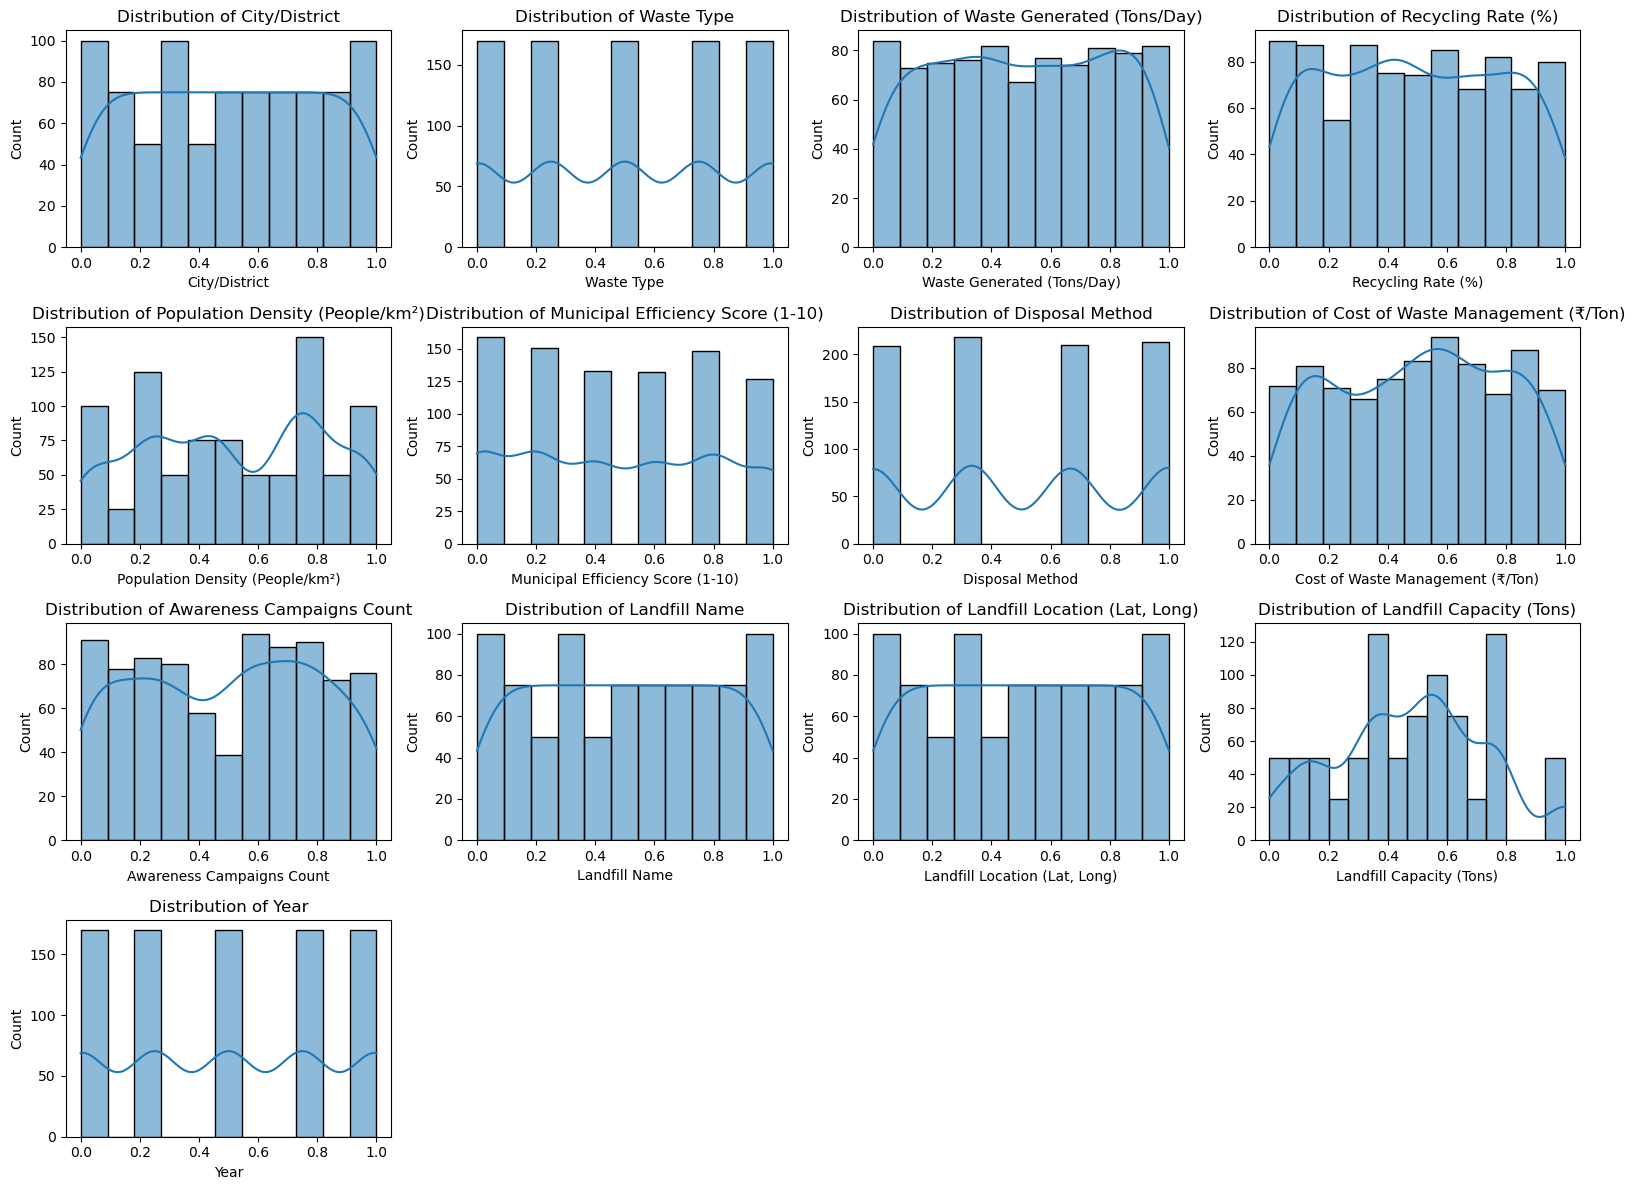

In [11]:
# Data Distribution Checks
import math
cols = 4
rows = math.ceil(len(data.columns) / cols)

plt.figure(figsize=(cols*4, rows*3))

for i, feature in enumerate(data.columns, 1):
    plt.subplot(rows, cols, i)
    sns.histplot(data[feature], kde=True)
    plt.title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()